# Minimal SHAP example

In [2]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from xgboost import XGBRegressor

# Import machine learning methods
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, \
                            r2_score, root_mean_squared_error

# Import shap for shapley values
import shap

# JavaScript Important for the interactive charts later on
shap.initjs()

In [1]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state=42
    )

model = XGBRegressor(random_state=42)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


NameError: name 'datasets' is not defined

In [8]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap_values

.values =
array([[ 1.6490112e+01, -2.2398655e+00,  2.6193607e+01, ...,
        -2.0894939e-02,  1.9814386e+01,  5.8930135e+00],
       [-9.0710526e+00,  8.1053619e+00, -2.2246498e+01, ...,
         1.8925489e-01, -2.9967911e+01,  3.8399464e-01],
       [ 4.6181374e+00, -2.5832086e+00, -5.6339188e+00, ...,
        -2.3108444e-01, -4.5832672e+00,  5.4341358e-01],
       ...,
       [ 2.5119293e+01, -8.0221958e+00, -2.4874559e+01, ...,
         2.6691463e+00, -3.7630772e+01, -1.4326949e+00],
       [-1.1861322e+01,  4.7824688e+00, -5.9918742e+00, ...,
        -2.2903161e+00,  1.3962805e+01, -4.9342799e+00],
       [-8.4701500e+00,  4.3114119e+00, -3.9536705e+01, ...,
        -7.4162704e-01, -1.2817654e+01, -2.3913424e+00]], dtype=float32)

.base_values =
array([154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 1

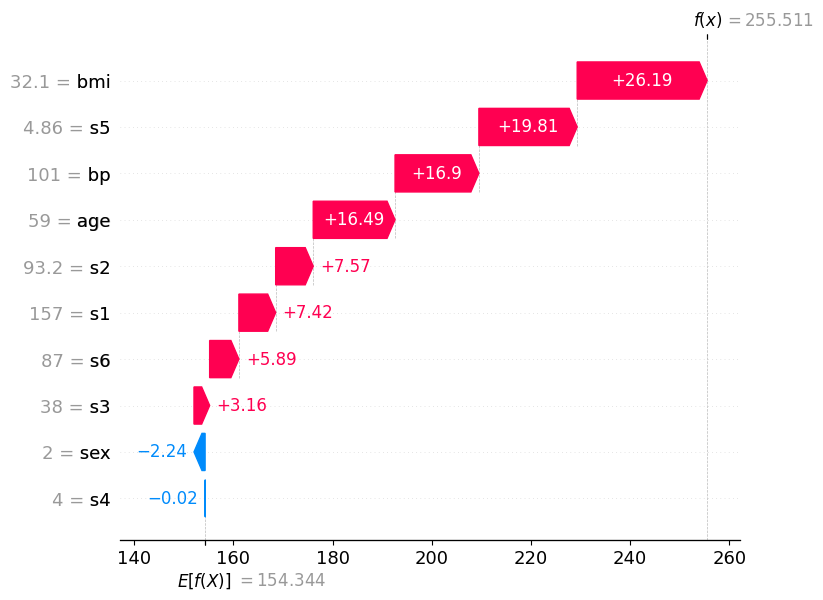

In [9]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

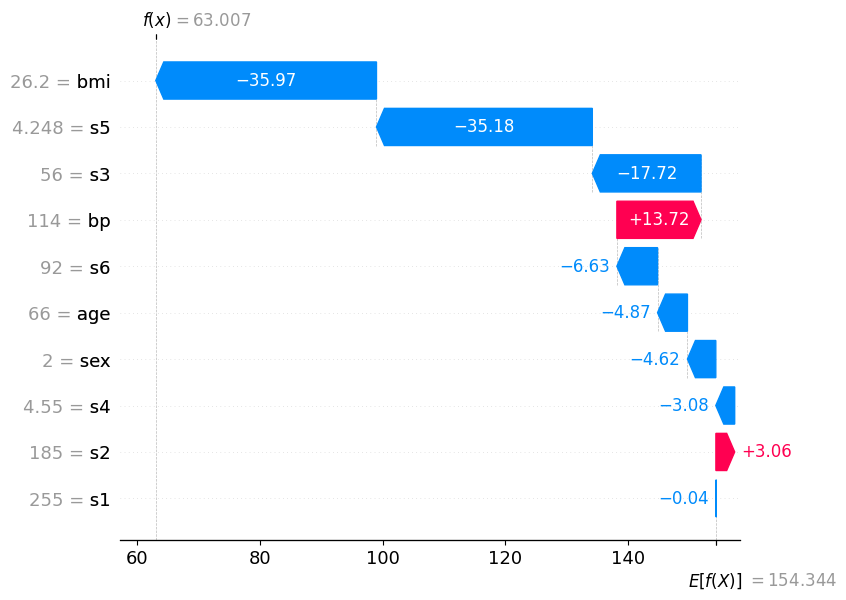

In [10]:
# visualize a later prediction's explanation
shap.plots.waterfall(shap_values[7])

## Force plots

In [7]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [8]:
# visualize all the predictions
shap.plots.force(shap_values)

## Dependence Plots

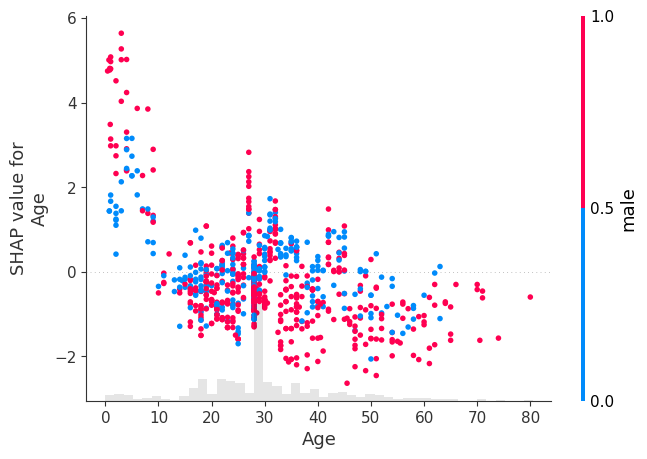

In [9]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

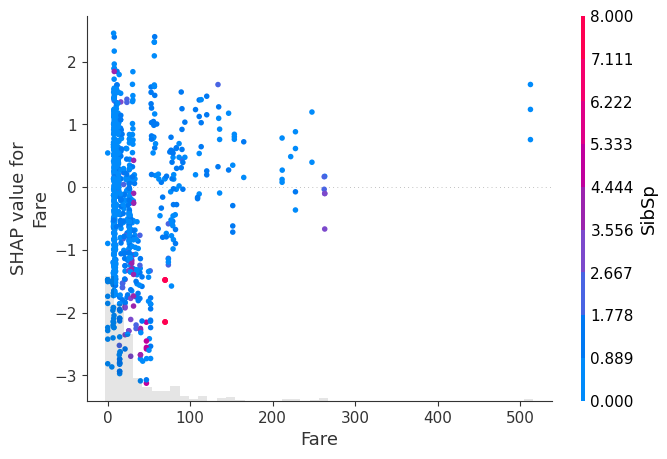

In [10]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Fare"], color=shap_values)

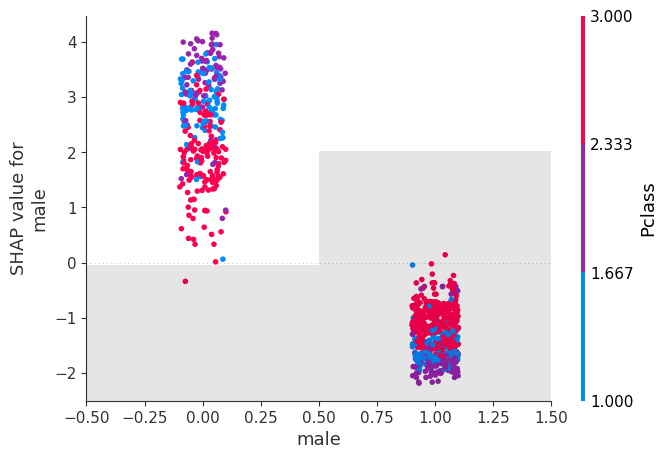

In [11]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

## Beeswarm

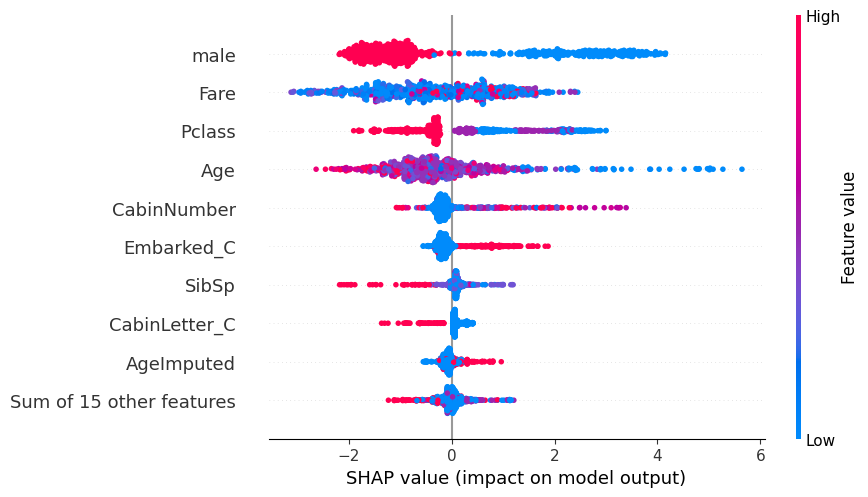

In [12]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## Bar

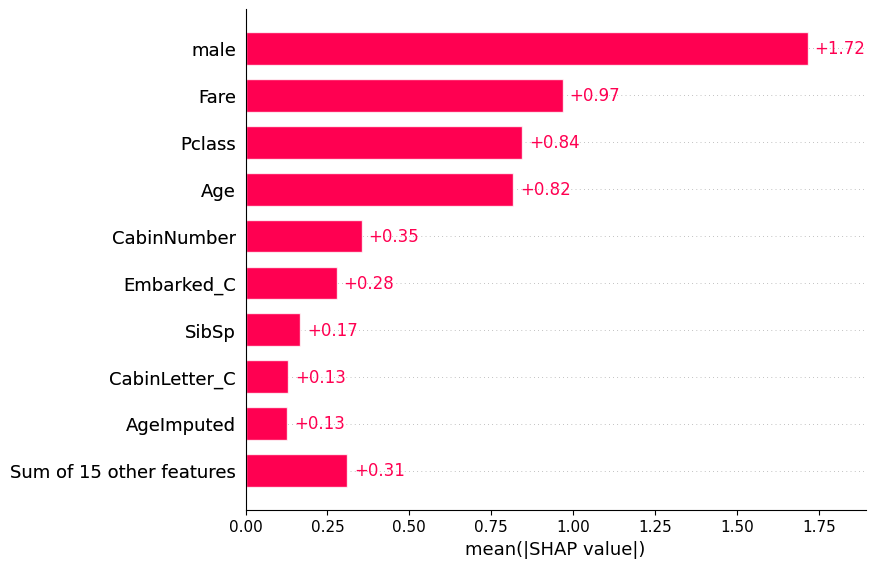

In [13]:
shap.plots.bar(shap_values)

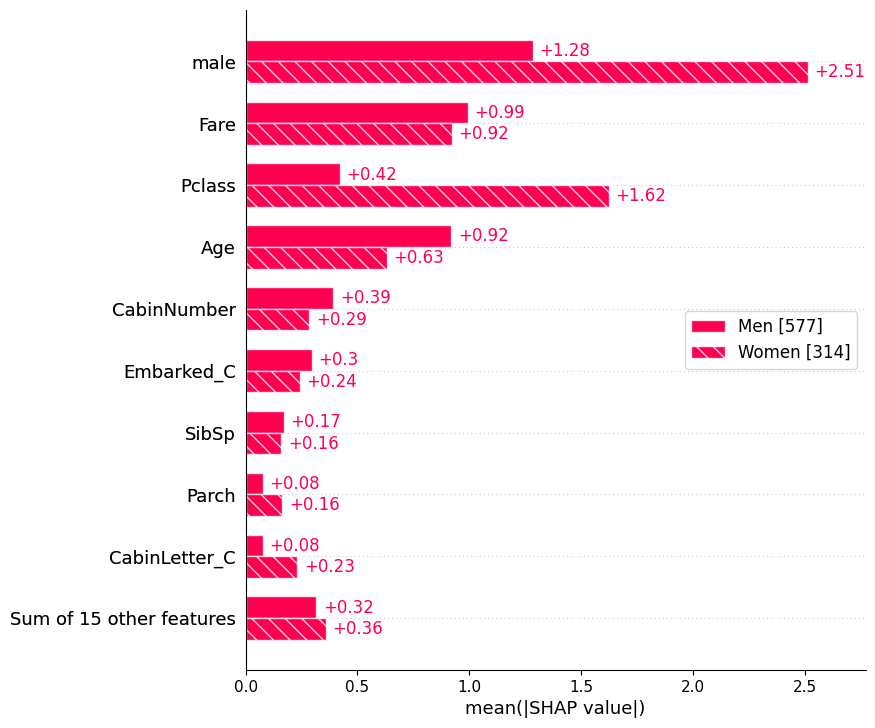

In [24]:
sex = ["Women" if shap_values[i, "male"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

Plot the bars for an individual.

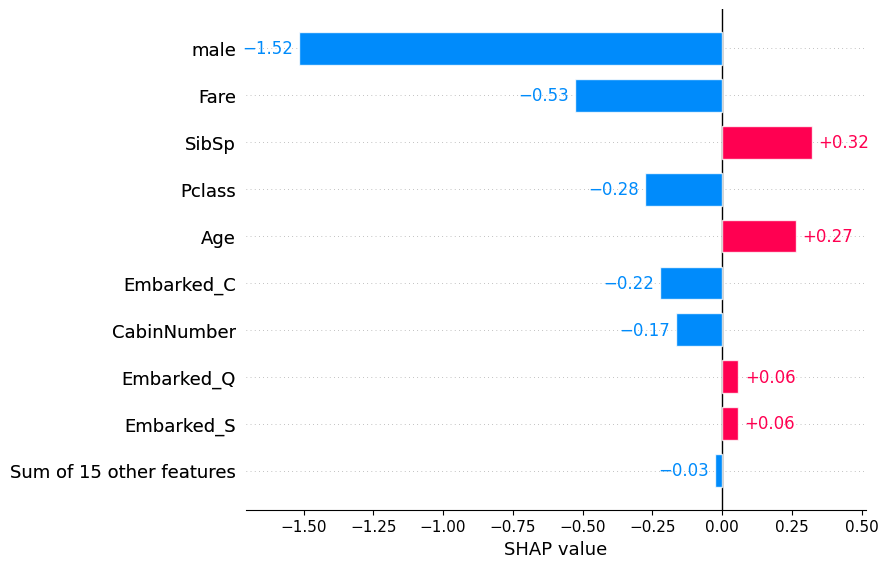

In [25]:
shap.plots.bar(shap_values[0])

# Comparison between KernelExplainer and TreeExplainer

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
kernel_explainer = shap.KernelExplainer(model.predict_proba, data=shap.utils.sample(X_test, 100))
shap_values_kernel = kernel_explainer(X_test)


TypeError: KernelExplainer.__call__() got an unexpected keyword argument 'n_samples'

In [26]:
tree_explainer = shap.TreeExplainer(model)
shap_values_tree = tree_explainer(X)

shap_values_tree

.values =
array([[-0.27582893,  0.26660144,  0.3217372 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.1510534 , -0.36999267, -0.05212411, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94937253,  0.08268124,  0.21456136, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5145619 , -1.122633  ,  0.14011872, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4761504 ,  0.93092906,  0.15789632, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28055772,  0.31930643,  0.09568977, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([-0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5

For some datasets, the impact of tree vs kernel shap is negligible or non-existant. 

<Axes: xlabel='mean(|SHAP value|)'>

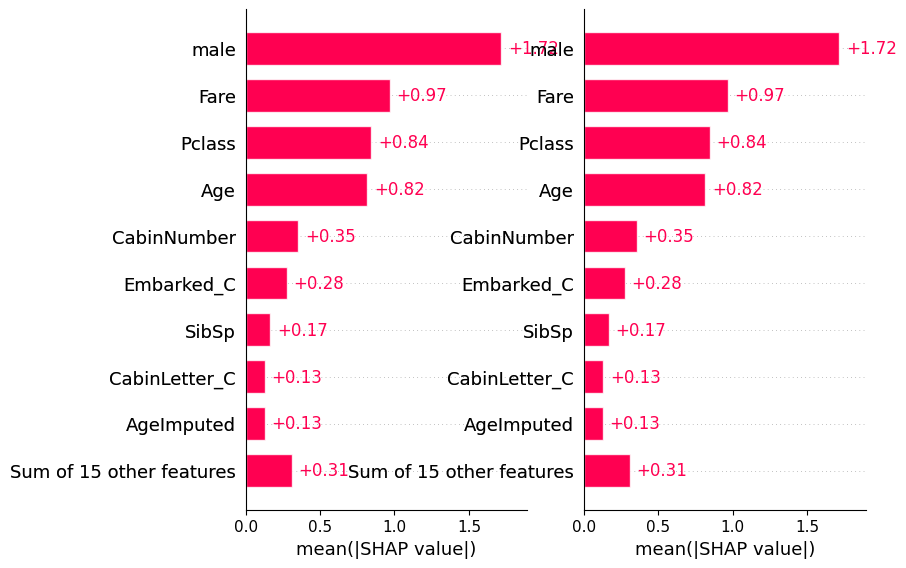

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
shap.plots.bar(shap_values, show=False)
plt.axes(ax1)
shap.plots.bar(shap_values_tree, show=False)
plt.axes(ax2)